# Exercise:

# Outlier Detection in a Customer Segmentation Dataset Using DBSCAN and GMM

## Objective:
Detect outliers in a synthetic customer segmentation dataset, which contains Age, Income, and Spending Score features. The aim is to detect customers whose behaviors do not fit well into any of the identified clusters.

## Data:
We will generate a synthetic dataset with Age, Income, and Spending Score features using sklearn's `make_blobs` and then apply DBSCAN to detect outliers. Afterward, you'll use Gaussian Mixture Models (GMM) to verify the outliers based on the log-likelihood of each point.

You need to use the following data for data generation as well as normalization.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate synthetic data: 300 samples, 3 centers (clusters)
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Add some noise (outliers) to the data
X_with_outliers = np.vstack([X, np.random.uniform(low=-10, high=10, size=(10, 2))])

# Convert to DataFrame for convenience
df = pd.DataFrame(X_with_outliers, columns=['Age', 'Income'])
df['Spending Score'] = np.random.uniform(1, 100, size=(df.shape[0],))

# Visualize the first few rows of the synthetic dataset
print(df.head())


10         Age    Income  Spending Score
0 -7.338988 -7.729954        6.283773
1 -7.740041 -7.264665       83.147636
2 -1.686653  7.793442       71.958186
3  4.422198  3.071947       11.597173
4 -8.917752 -7.888196        3.006157


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Age', 'Income', 'Spending Score']])

## Next steps:

a) Apply DBSCAN for Outlier Detection
You need to apply DBSCAN to identify outliers based on the density of data points. Outliers will be labeled as `-1` by DBSCAN.

b) Visualize the clusters formed by DBSCAN and highlight the outliers.

c) Apply Gaussian Mixture Model (GMM) to the data and use the log-likelihood to check which points do not fit well with the Gaussian distributions. Low log-likelihood points are considered outliers.

d) Visualize the GMM detected outliers.

e) Compare DBSCAN and GMM Outliers.

In [ ]:
#Apply DBSCAN
from sklearn.cluster import DBSCAN

# Apply DBSCAN with chosen parameters (eps and min_samples)
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Outliers are labeled as -1 by DBSCAN
outliers_dbscan = df[dbscan_labels == -1]

print(f"Outliers detected by DBSCAN:\n{outliers_dbscan}")


Outliers detected by DBSCAN:
Empty DataFrame
Columns: [Age, Income, Spending Score]
Index: []


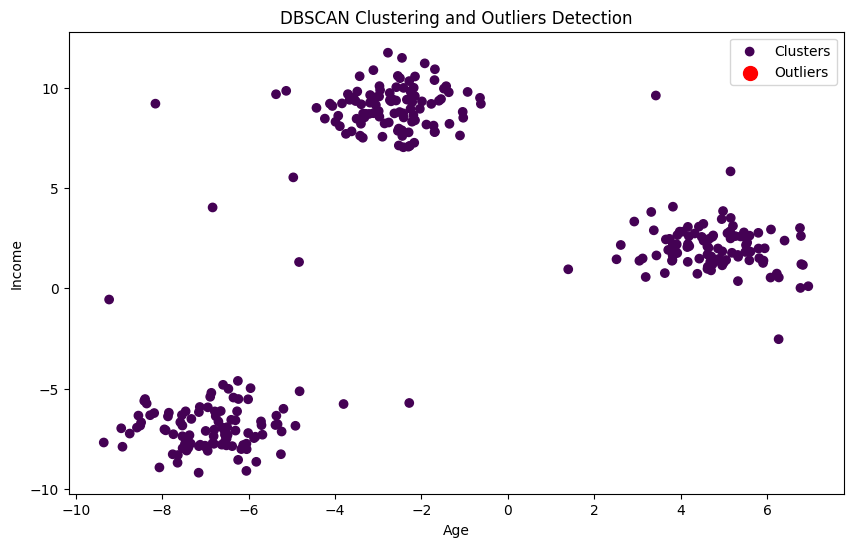

In [ ]:
# Visualize the clusters of DBSCAN

import matplotlib.pyplot as plt

# Plot the clusters and outliers detected by DBSCAN
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Income'], c=dbscan_labels, cmap='viridis', label='Clusters')
plt.scatter(outliers_dbscan['Age'], outliers_dbscan['Income'], color='red', label='Outliers', s=100)
plt.title('DBSCAN Clustering and Outliers Detection')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()


In [ ]:
#Apply GMM to detect the outliers

from sklearn.mixture import GaussianMixture

# Fit GMM with 3 components (clusters)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_scaled)

# Calculate the log likelihood for each point
log_likelihood = gmm.score_samples(X_scaled)

# Identify points with low log likelihood values as potential outliers
threshold = log_likelihood.mean() - 2 * log_likelihood.std()  # Adjust the threshold
outliers_gmm = df[log_likelihood < threshold]

print(f"Outliers detected by GMM (low log likelihood):\n{outliers_gmm}")


Outliers detected by GMM (low log likelihood):
          Age    Income  Spending Score
55   5.154927  5.825901       18.714139
188  1.398611  0.948782       58.270276
303 -4.831300  1.311241       41.921501
304  6.267827 -2.532111       65.456693
305 -6.832102  4.028980       75.000521
306 -2.280941 -5.708524       22.520503
307 -9.227006 -0.556507       47.722642
308  3.426116  9.603657       25.353613
309 -8.155630  9.197134       33.025734


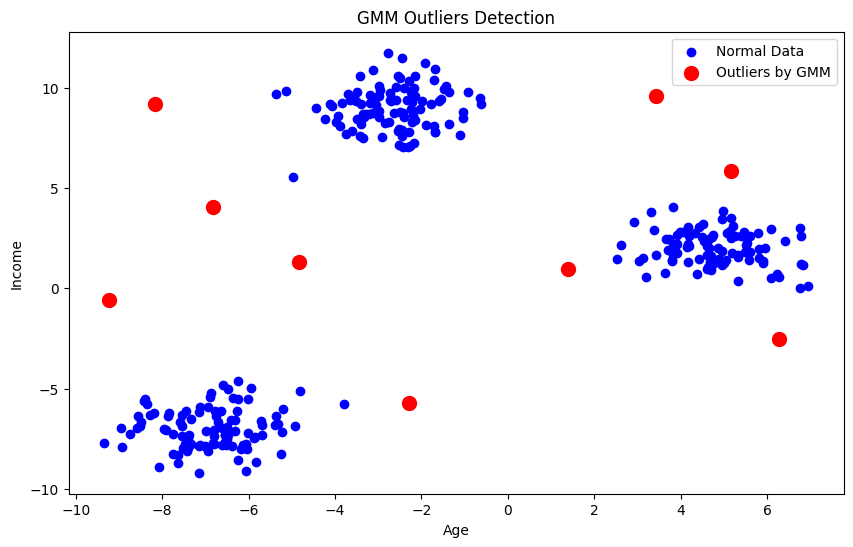

In [ ]:
# Visualize GMM outliers

# Visualize the points identified as outliers by GMM
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Income'], c='blue', label='Normal Data')
plt.scatter(outliers_gmm['Age'], outliers_gmm['Income'], color='red', label='Outliers by GMM', s=100)
plt.title('GMM Outliers Detection')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()


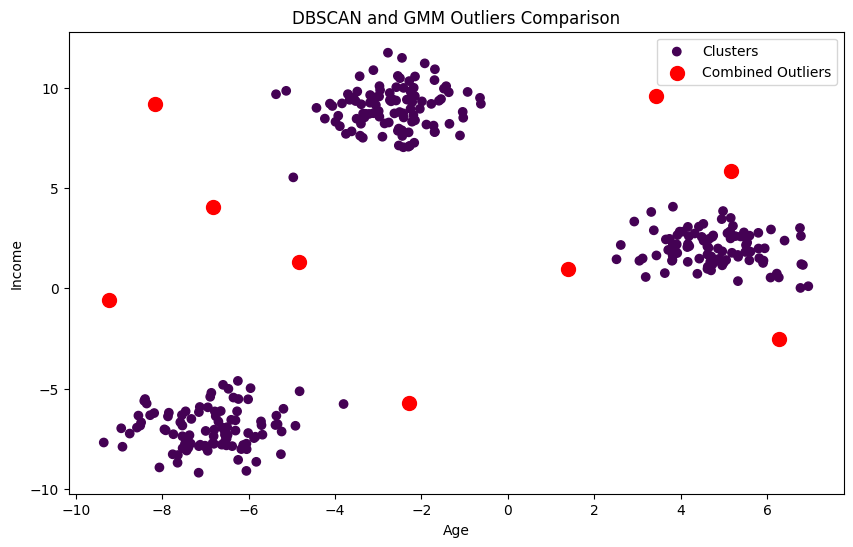

In [ ]:
# Compare DBSCAN and GMM outliers

# Combine outliers from both methods for comparison
outliers_combined = pd.concat([outliers_dbscan, outliers_gmm]).drop_duplicates()

# Visualize the comparison of DBSCAN and GMM outliers
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Income'], c=dbscan_labels, cmap='viridis', label='Clusters')
plt.scatter(outliers_combined['Age'], outliers_combined['Income'], color='red', label='Combined Outliers', s=100)
plt.title('DBSCAN and GMM Outliers Comparison')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()
